In [1]:
#ładowanie niezbędnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import seaborn as sns

In [3]:
#przykładowy zbiór danych - pomiary fizykochemiczne wlasności portugalskich win typu Vinho Verde (białe i czerwone) 
wine = pd.read_csv("../dane/winequality-all.csv", comment="#")
wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  response color  
0      9.4         3   red  
1      9.8         3   red  
2      9.8         3   red  
3      9.8         4   red  
4      9.4         3   red

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


In [5]:
wine.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
response                  int64
color                    object
dtype: object

In [6]:
#kolor wina jest typu object, więc musimy zmienić tą zmienną na zmienną kategoryczną
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.2 KB


In [7]:
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [8]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response', 'color'],
      dtype='object')

In [9]:
wine.shape

(5320, 13)

In [10]:
wine.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     3.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.110000     0.430000     9.500000     3.000000  
50%       3.210000     0.510000    10.400000     4.000000  
75%       3.330000     0.600000    11.400000     4.000000  
max       4.010000     2.000000    14.900000     7.000000

In [11]:
wine.iloc[:, 0:11].describe().round(2).T.iloc[:, 1:]

mean    std   min    25%     50%     75%     max
fixed.acidity           7.22   1.32  3.80   6.40    7.00    7.70   15.90
volatile.acidity        0.34   0.17  0.08   0.23    0.30    0.41    1.58
citric.acid             0.32   0.15  0.00   0.24    0.31    0.40    1.66
residual.sugar          5.05   4.50  0.60   1.80    2.70    7.50   65.80
chlorides               0.06   0.04  0.01   0.04    0.05    0.07    0.61
free.sulfur.dioxide    30.04  17.81  1.00  16.00   28.00   41.00  289.00
total.sulfur.dioxide  114.11  56.77  6.00  74.00  116.00  153.25  440.00
density                 0.99   0.00  0.99   0.99    0.99    1.00    1.04
pH                      3.22   0.16  2.72   3.11    3.21    3.33    4.01
sulphates               0.53   0.15  0.22   0.43    0.51    0.60    2.00
alcohol                10.55   1.19  8.00   9.50   10.40   11.40   14.90

In [12]:
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [13]:
wine[wine.color == "white"].describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     3.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.090000     0.410000     9.500000     3.000000  
50%       3.180000     0.480000    10.400000     4.000000  
75%       3.290000     0.550000    11.400000     4.000000  
max       3.820000     1.080000    14.200000     7.000000

In [14]:
wine[wine.color == "red"].describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol     response  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     3.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     1.000000  
25%       3.210000     0.550000     9.500000     3.000000  
50%       3.310000     0.620000    10.200000     4.000000  
75%       3.400000     0.730000    11.100000     4.000000  
max       4.010000     2.000000    14.900000     6.000000

In [15]:
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:12]
white_wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0   1.0010  3.00       0.45   
1360                 14.0                 132.0   0.9940  3.30       0.49   
1361                 30.0                  97.0   0.9951  3.26       0.44   
1362                 47.0                 186.0   0.9956  3.19       0.40   
1363                 30.0                 136.0   0.9949  3.18       0.47   

      alcohol  response  
1359      8.8         4  
1360      9.5         4  
1361     10.1         4  
1362      9.9         4  
1363      9.6         4

In [16]:
#tworzymy macierze zmiennych objaśniających (predyktorów) i wektor kolumnowy zmiennej objaśnianej
y = white_wine.iloc[:, -2]
y.head()


1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
Name: alcohol, dtype: float64

In [17]:
white_wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'response'],
      dtype='object')

In [18]:
X = white_wine[['fixed.acidity',
                'volatile.acidity',
                'citric.acid',
                'residual.sugar',
                'chlorides',
                'free.sulfur.dioxide',
                'total.sulfur.dioxide',
                'density',
                'pH',
                'sulphates',
                'response']]
X.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0   1.0010  3.00       0.45   
1360                 14.0                 132.0   0.9940  3.30       0.49   
1361                 30.0                  97.0   0.9951  3.26       0.44   
1362                 47.0                 186.0   0.9956  3.19       0.40   
1363                 30.0                 136.0   0.9949  3.18       0.47   

      response  
1359         4  
1360         4  
1361         4  
1362         4  
1363         4

In [19]:
X.shape

(3961, 11)

In [20]:
y.shape

(3961,)

In [21]:
#obliczmy wspóczynnik korelacji liniowej Pearsona
corr_P = white_wine.corr("pearson")
corr_P.shape

(12, 12)

In [22]:
corr_P

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.019214     0.298959   
volatile.acidity          -0.019214          1.000000    -0.163228   
citric.acid                0.298959         -0.163228     1.000000   
residual.sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free.sulfur.dioxide       -0.058396         -0.102471     0.091681   
total.sulfur.dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
response                  -0.124636         -0.190678     0.007065   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.083620   0.024036            -0.058396   
volatile.acidity            0.098340   0.086287            -0.102471   
citric.acid                 0.106269   0.132590             0.091681   
residual.sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free.sulfur.dioxide         0.306835   0.101272             1.000000   
total.sulfur.dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   
response                   -0.117339  -0.217739             0.010507   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile.acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric.acid                       0.122845  0.160076 -0.183015   0.049442   
residual.sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free.sulfur.dioxide               0.619437  0.294638 -0.007750   0.037932   
total.sulfur.dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   
response                         -0.183356 -0.337805  0.123829   0.053200   

                       alcohol  response  
fixed.acidity        -0.110788 -0.124636  
volatile.acidity      0.046815 -0.190678  
citric.acid          -0.076514  0.007065  
residual.sugar       -0.398167 -0.117339  
chlorides            -0.356928 -0.217739  
free.sulfur.dioxide  -0.251768  0.010507  
total.sulfur.dioxide -0.446643 -0.183356  
density              -0.760162 -0.337805  
pH                    0.093095  0.123829  
sulphates            -0.022850  0.053200  
alcohol               1.000000  0.462869  
response              0.462869  1.000000

In [23]:
#tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od 0.5
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri

density               alcohol                -0.760162
total.sulfur.dioxide  alcohol                -0.446643
fixed.acidity         pH                     -0.431274
residual.sugar        alcohol                -0.398167
chlorides             alcohol                -0.356928
                                                ...   
residual.sugar        total.sulfur.dioxide    0.409583
alcohol               response                0.462869
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
Length: 66, dtype: float64

In [24]:
corr_P_tri[abs(corr_P_tri)>0.5]

density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

In [25]:
corr_S = white_wine.corr("spearman")
corr_S.shape

(12, 12)

In [26]:
corr_S

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.037328     0.308689   
volatile.acidity          -0.037328          1.000000    -0.161104   
citric.acid                0.308689         -0.161104     1.000000   
residual.sugar             0.092093          0.145917     0.030789   
chlorides                  0.090136          0.017037     0.047333   
free.sulfur.dioxide       -0.035506         -0.089430     0.084318   
total.sulfur.dioxide       0.096047          0.132091     0.089576   
density                    0.263979          0.037931     0.099580   
pH                        -0.420407         -0.062852    -0.169143   
sulphates                 -0.007606         -0.007954     0.062574   
alcohol                   -0.087765          0.013266    -0.034389   
response                  -0.094236         -0.185385     0.030293   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.092093   0.090136            -0.035506   
volatile.acidity            0.145917   0.017037            -0.089430   
citric.acid                 0.030789   0.047333             0.084318   
residual.sugar              1.000000   0.191767             0.345052   
chlorides                   0.191767   1.000000             0.165546   
free.sulfur.dioxide         0.345052   0.165546             1.000000   
total.sulfur.dioxide        0.431846   0.368464             0.619998   
density                     0.743296   0.500773             0.322096   
pH                         -0.153187  -0.033579            -0.017051   
sulphates                   0.000744   0.099878             0.031688   
alcohol                    -0.378605  -0.565509            -0.270173   
response                   -0.092462  -0.333089             0.032555   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                     0.096047  0.263979 -0.420407  -0.007606   
volatile.acidity                  0.132091  0.037931 -0.062852  -0.007954   
citric.acid                       0.089576  0.099580 -0.169143   0.062574   
residual.sugar                    0.431846  0.743296 -0.153187   0.000744   
chlorides                         0.368464  0.500773 -0.033579   0.099878   
free.sulfur.dioxide               0.619998  0.322096 -0.017051   0.031688   
total.sulfur.dioxide              1.000000  0.568226 -0.002188   0.156994   
density                           0.568226  1.000000 -0.080766   0.103765   
pH                               -0.002188 -0.080766  1.000000   0.130640   
sulphates                         0.156994  0.103765  0.130640   1.000000   
alcohol                          -0.473471 -0.808451  0.119420  -0.060261   
response                         -0.202576 -0.382900  0.136190   0.035592   

                       alcohol  response  
fixed.acidity        -0.087765 -0.094236  
volatile.acidity      0.013266 -0.185385  
citric.acid          -0.034389  0.030293  
residual.sugar       -0.378605 -0.092462  
chlorides            -0.565509 -0.333089  
free.sulfur.dioxide  -0.270173  0.032555  
total.sulfur.dioxide -0.473471 -0.202576  
density              -0.808451 -0.382900  
pH                    0.119420  0.136190  
sulphates            -0.060261  0.035592  
alcohol               1.000000  0.475713  
response              0.475713  1.000000

In [27]:
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_S_tri

density               alcohol                -0.808451
chlorides             alcohol                -0.565509
total.sulfur.dioxide  alcohol                -0.473471
fixed.acidity         pH                     -0.420407
density               response               -0.382900
                                                ...   
alcohol               response                0.475713
chlorides             density                 0.500773
total.sulfur.dioxide  density                 0.568226
free.sulfur.dioxide   total.sulfur.dioxide    0.619998
residual.sugar        density                 0.743296
Length: 66, dtype: float64

In [28]:
corr_S_tri[abs(corr_S_tri)>0.5]

density               alcohol                -0.808451
chlorides             alcohol                -0.565509
                      density                 0.500773
total.sulfur.dioxide  density                 0.568226
free.sulfur.dioxide   total.sulfur.dioxide    0.619998
residual.sugar        density                 0.743296
dtype: float64

In [29]:
corr_P_tri[abs(corr_P_tri)>0.5]

density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

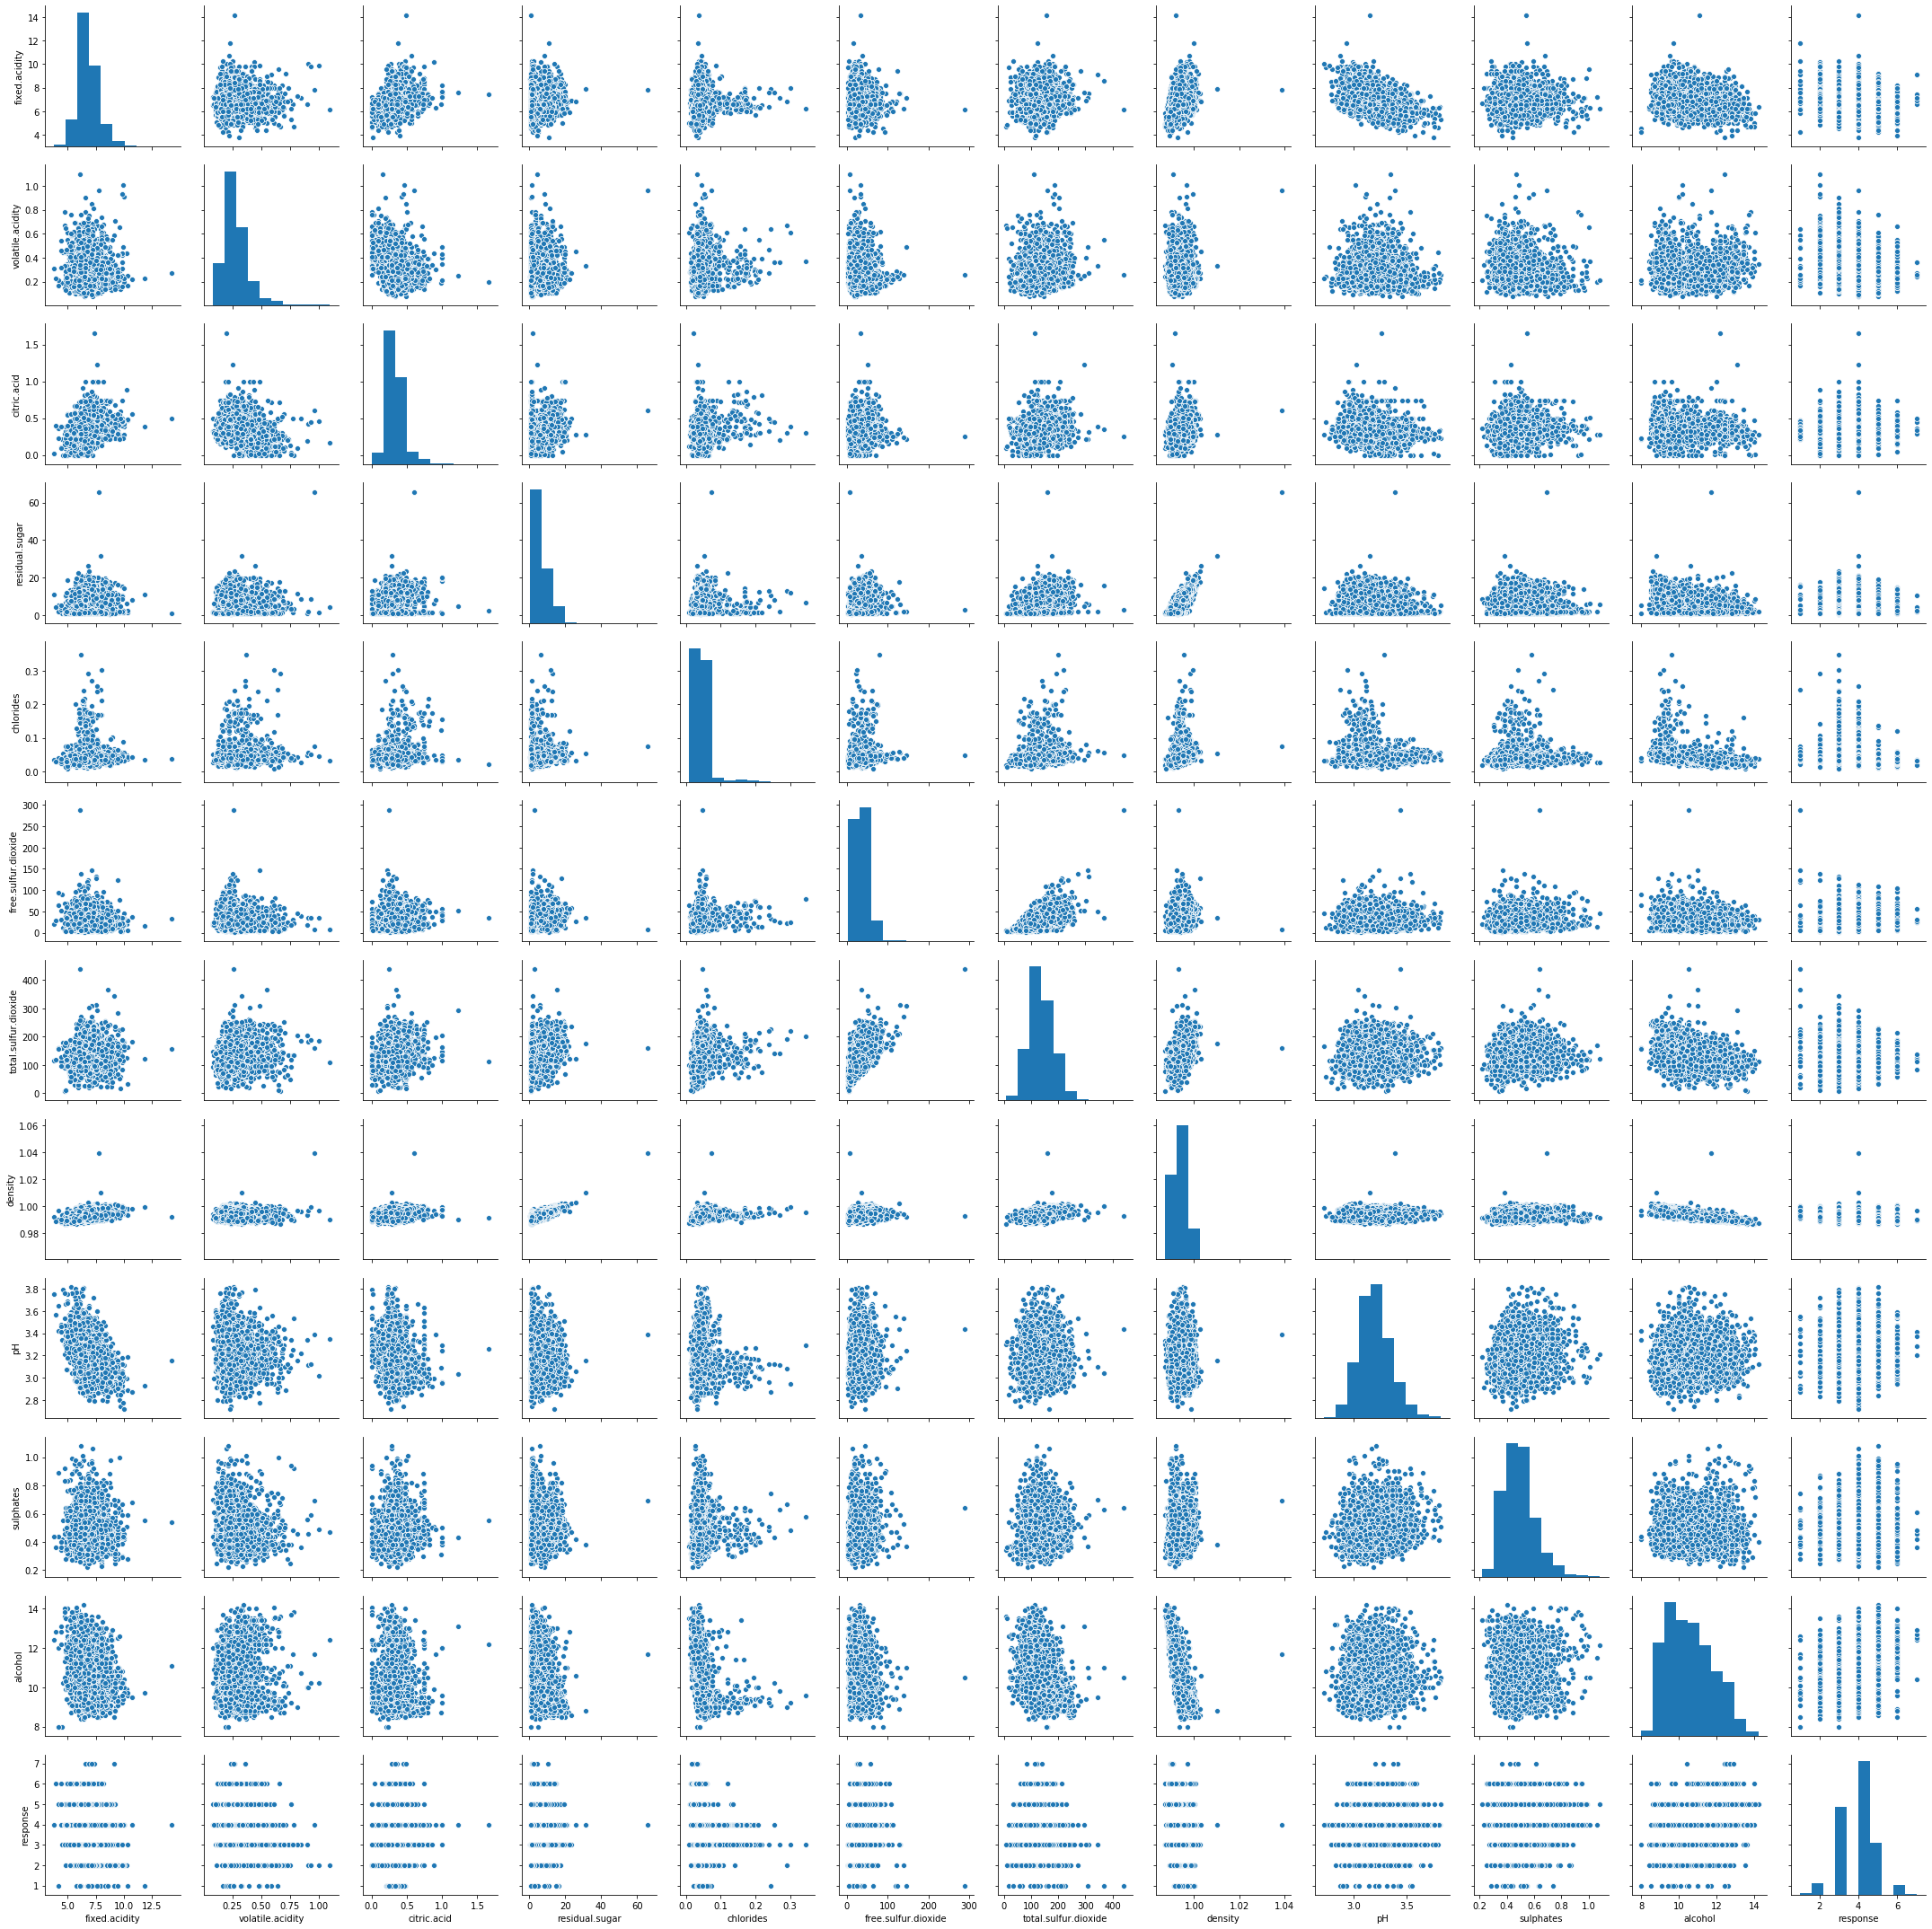

In [30]:
sns.pairplot(white_wine)
plt.show()

In [31]:
import sklearn.linear_model

In [32]:
#help(sklearn.linear_model.LinearRegression())

In [33]:
mnk = sklearn.linear_model.LinearRegression()

In [34]:
mnk

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
mnk.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
mnk.intercept_

659.50178658962

In [37]:
mnk.coef_

array([ 4.96794963e-01,  9.99248224e-01,  3.92203106e-01,  2.33484023e-01,
       -3.50380005e-01, -3.65984458e-03,  3.21492203e-04, -6.66337495e+02,
        2.32656819e+00,  9.55169783e-01,  7.61181799e-02])

In [38]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'response'],
      dtype='object')

alc = 4.96794959e-01*fixed.acidity + 9.99248234e-01*volatile.acidity + 3.92203107e-01*citric.acid + ... + 659.5017816666036

In [39]:
white_wine.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     3.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.090000     0.410000     9.500000     3.000000  
50%       3.180000     0.480000    10.400000     4.000000  
75%       3.290000     0.550000    11.400000     4.000000  
max       3.820000     1.080000    14.200000     7.000000

In [40]:
x_nowy = X.mean().values.reshape(1,-1)+0.0001
x_nowy

array([[6.83944612e+00, 2.80637743e-01, 3.34432239e-01, 5.91491949e+00,
        4.60050745e-02, 3.48892694e+01, 1.37193612e+02, 9.93889530e-01,
        3.19555822e+00, 4.90450921e-01, 3.85493464e+00]])

In [41]:
mnk.predict(x_nowy)

array([10.52323674])

In [42]:
#dla zbioru wystandaryzowanego, współczynniki regresji nabierają przydatnej interpretacji
#tzn. im większa wartość modułu współczynnika, tym bardziej istotny ma on wpływ na wartość odpowiedzi
X_std = (X-X.mean(axis=0))/X.std(axis=0)
X_std.describe()

fixed.acidity  volatile.acidity   citric.acid  residual.sugar  \
count   3.961000e+03      3.961000e+03  3.961000e+03    3.961000e+03   
mean    1.935272e-14      8.087727e-16  3.636369e-14   -3.493236e-15   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -3.506157e+00     -1.938741e+00 -2.730444e+00   -1.093214e+00   
25%    -6.221838e-01     -6.819386e-01 -5.253923e-01   -8.875223e-01   
50%    -4.538926e-02     -1.985530e-01 -1.170494e-01   -2.498782e-01   
75%     5.314053e-01      4.781869e-01  4.546308e-01    6.140267e-01   
max     8.491171e+00      7.922325e+00  1.082654e+01    1.231788e+01   

          chlorides  free.sulfur.dioxide  total.sulfur.dioxide       density  \
count  3.961000e+03         3.961000e+03          3.961000e+03  3.961000e+03   
mean  -1.258625e-14         1.289888e-16         -3.190245e-16  2.000196e-12   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.597435e+00        -1.911048e+00         -2.972323e+00 -2.299642e+00   
25%   -4.720257e-01        -6.908283e-01         -7.232596e-01 -7.469302e-01   
50%   -1.690310e-01        -1.097715e-01         -9.723169e-02 -9.968011e-02   
75%    1.772487e-01         5.874967e-01          6.679136e-01  6.611831e-01   
max    1.298960e+01         1.476528e+01          7.020938e+00  1.555826e+01   

                 pH     sulphates      response  
count  3.961000e+03  3.961000e+03  3.961000e+03  
mean   3.677989e-14 -1.420183e-14 -4.602128e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -3.137394e+00 -2.381468e+00 -3.205221e+00  
25%   -6.958845e-01 -7.077954e-01 -9.597522e-01  
50%   -1.020038e-01 -9.117923e-02  1.629821e-01  
75%    6.238505e-01  5.254370e-01  1.629821e-01  
max    4.121148e+00  5.194102e+00  3.531185e+00

In [43]:
y_std = (y-y.mean())/y.std()

In [44]:
y_std.describe()

count    3.961000e+03
mean    -3.194917e-14
std      1.000000e+00
min     -2.127523e+00
25%     -8.950613e-01
50%     -1.555843e-01
75%      6.660569e-01
max      2.966652e+00
Name: alcohol, dtype: float64

In [45]:
mnk_std = sklearn.linear_model.LinearRegression()
mnk_std.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
mnk_std.coef_

array([ 0.35384104,  0.08492428,  0.03945828,  0.93265864, -0.00665096,
       -0.05175189,  0.0113926 , -1.59023806,  0.28969514,  0.08909347,
        0.05570492])

In [49]:
pd.Series(np.abs(mnk_std.coef_), index=X.columns.to_list()).round(4).sort_values(ascending=False)

density                 1.5902
residual.sugar          0.9327
fixed.acidity           0.3538
pH                      0.2897
sulphates               0.0891
volatile.acidity        0.0849
response                0.0557
free.sulfur.dioxide     0.0518
citric.acid             0.0395
total.sulfur.dioxide    0.0114
chlorides               0.0067
dtype: float64

In [58]:
#ocena jakości modelu
#porównanie wartości dopasowanych, obliczonych za pomocą modelu z wartościami oryginalnymi
y_pred = mnk.predict(X)
y_pred[0:20]

array([ 8.80782524,  9.52303398, 10.71432488,  9.98880228,  9.72969127,
       10.20775979, 11.77590928, 10.33623859, 11.20496969, 11.94210973,
       10.00455896, 11.23237616,  9.93621893, 13.05331995, 11.1832781 ,
        9.60817889, 11.38351904, 10.88869421,  9.9606006 ,  9.12146167])

In [59]:
y[0:20]

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
1364    11.0
1365    12.0
1366     9.7
1367    10.8
1368    12.4
1369     9.7
1370    11.4
1371     9.6
1372    12.8
1373    11.3
1374     9.5
1375    11.0
1376    10.5
1377     9.3
1378    10.0
Name: alcohol, dtype: float64

In [53]:
#współczynnik determinacji R2
mnk.score(X,y)

0.8602729641832264

In [54]:
sklearn.metrics.r2_score(y, y_pred)

0.8602729641832265

In [55]:
#MSE
sklearn.metrics.mean_squared_error(y, y_pred)

0.20692187670541784

In [56]:
#MAE
sklearn.metrics.mean_absolute_error(y, y_pred)

0.30189791848771835

In [57]:
#MedAE
sklearn.metrics.median_absolute_error(y, y_pred)

0.25039224100328283

In [60]:
#zależy nam na dobrych zdolnościach predykcyjnych modelu
#ale uważamy też żeby nie przeuczyć modelu, 
#zatem dzielimy zbiór na próbę uczącą (80%) i testową (20%)
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(3168, 11)
(793, 11)
(3168,)
(793,)


In [61]:
#stworzymy funkcję, która dopasowuje model regresji liniowej do danej próby
#oraz oblicza miary błędów dopasowania

def fit_regression(model, X_ucz, X_test, y_ucz, y_test):
    model.fit(X_ucz, y_ucz)
    
    y_ucz_pred = model.predict(X_ucz)
    y_test_pred = model.predict(X_test)
    
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    medae = sklearn.metrics.median_absolute_error
    
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred),
        "MEDAE_u": medae(y_ucz, y_ucz_pred),
        "MEDAE_t": medae(y_test, y_test_pred)
    }

In [62]:
#przedstawiamy działanie powyższej funkcji oraz wyniki
model_names = ["Reg. liniowa"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, y_ucz, y_test)]
df_results_errors = pd.DataFrame(res, index=model_names)

In [63]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. liniowa   0.907116   0.628388  0.138295  0.535985  0.281841  0.306624   

               MEDAE_u   MEDAE_t  
Reg. liniowa  0.229005  0.232459

In [64]:
X_ucz123, X_test123, y_ucz123, y_test123 = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=123)

In [68]:
model_names = ["Reg. liniowa rs=123"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz123, X_test123, y_ucz123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [69]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa          0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123   0.849271   0.903621  0.223283  0.142520  0.307927   

                        MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa         0.306624  0.229005  0.232459  
Reg. liniowa rs=123  0.290733  0.255820  0.241416

In [70]:
X_ucz70, X_test70, y_ucz70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=12345)

In [71]:
model_names = ["Reg. liniowa 70"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70, X_test70, y_ucz70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [72]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa          0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123   0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70       0.905493   0.727336  0.140282  0.400296  0.282696   

                        MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa         0.306624  0.229005  0.232459  
Reg. liniowa rs=123  0.290733  0.255820  0.241416  
Reg. liniowa 70      0.296796  0.228485  0.231236

In [73]:
X_ucz70_123, X_test70_123, y_ucz70_123, y_test70_123 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

In [74]:
model_names = ["Reg. liniowa 70 rs=123"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70_123, X_test70_123, y_ucz70_123, y_test70_123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [75]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa             0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123      0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70          0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123   0.905206   0.729919  0.140562  0.398570  0.283867   

                           MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa            0.306624  0.229005  0.232459  
Reg. liniowa rs=123     0.290733  0.255820  0.241416  
Reg. liniowa 70         0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123  0.294339  0.230758  0.220819

In [76]:
X_ucz70_std, X_test70_std, y_ucz70_std, y_test70_std = sklearn.model_selection.train_test_split(X_std,
                                                                                                y_std,
                                                                                                test_size=0.3,
                                                                                                random_state=12345)

In [77]:
model_names = ["Reg. liniowa 70 std"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70_std, X_test70_std, y_ucz70_std, y_test70_std)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [78]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa             0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123      0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70          0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123   0.905206   0.729919  0.140562  0.398570  0.283867   
Reg. liniowa 70 std      0.905493   0.727336  0.094704  0.270237  0.232274   

                           MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa            0.306624  0.229005  0.232459  
Reg. liniowa rs=123     0.290733  0.255820  0.241416  
Reg. liniowa 70         0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123  0.294339  0.230758  0.220819  
Reg. liniowa 70 std     0.243860  0.187733  0.189993

Zadanie:
Sprawdź wyniki modelu dla danych znormalizowanych min_max : (x - x.min)/(x.max - x.min)
https://en.wikipedia.org/wiki/Feature_scaling

In [80]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'response'],
      dtype='object')

In [81]:
X_wout_chl = X.copy()

In [83]:
X_wout_chl.drop(['chlorides'], axis=1, inplace=True)

In [84]:
X_wout_chl

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
1359            7.0              0.27         0.36            20.7   
1360            6.3              0.30         0.34             1.6   
1361            8.1              0.28         0.40             6.9   
1362            7.2              0.23         0.32             8.5   
1363            6.2              0.32         0.16             7.0   
...             ...               ...          ...             ...   
5315            6.2              0.21         0.29             1.6   
5316            6.6              0.32         0.36             8.0   
5317            6.5              0.24         0.19             1.2   
5318            5.5              0.29         0.30             1.1   
5319            6.0              0.21         0.38             0.8   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0  1.00100  3.00       0.45   
1360                 14.0                 132.0  0.99400  3.30       0.49   
1361                 30.0                  97.0  0.99510  3.26       0.44   
1362                 47.0                 186.0  0.99560  3.19       0.40   
1363                 30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      response  
1359         4  
1360         4  
1361         4  
1362         4  
1363         4  
...        ...  
5315         4  
5316         3  
5317         4  
5318         5  
5319         4  

[3961 rows x 10 columns]

In [86]:
X_ucz70_wout_chl, X_test70_wout_chl, y_ucz70_wout_chl, y_test70_wout_chl =\
        sklearn.model_selection.train_test_split(X_wout_chl,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=12345)

In [87]:
model_names = ["Reg. liniowa 70 wout chl"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz70_wout_chl,
                      X_test70_wout_chl,
                      y_ucz70_wout_chl,
                      y_test70_wout_chl)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [88]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123        0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70            0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123     0.905206   0.729919  0.140562  0.398570  0.283867   
Reg. liniowa 70 std        0.905493   0.727336  0.094704  0.270237  0.232274   
Reg. liniowa 70 wout chl   0.905354   0.728708  0.140488  0.398282  0.283450   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306624  0.229005  0.232459  
Reg. liniowa rs=123       0.290733  0.255820  0.241416  
Reg. liniowa 70           0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123    0.294339  0.230758  0.220819  
Reg. liniowa 70 std       0.243860  0.187733  0.189993  
Reg. liniowa 70 wout chl  0.297103  0.230131  0.230466

In [89]:
X_wout_den = X.copy()

In [90]:
X_wout_den.drop(['density'], axis=1, inplace=True)

In [91]:
X_wout_den

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide    pH  sulphates  response  
1359                 45.0                 170.0  3.00       0.45         4  
1360                 14.0                 132.0  3.30       0.49         4  
1361                 30.0                  97.0  3.26       0.44         4  
1362                 47.0                 186.0  3.19       0.40         4  
1363                 30.0                 136.0  3.18       0.47         4  
...                   ...                   ...   ...        ...       ...  
5315                 24.0                  92.0  3.27       0.50         4  
5316                 57.0                 168.0  3.15       0.46         3  
5317                 30.0                 111.0  2.99       0.46         4  
5318                 20.0                 110.0  3.34       0.38         5  
5319                 22.0                  98.0  3.26       0.32         4  

[3961 rows x 10 columns]

In [92]:
X_ucz70_wout_den, X_test70_wout_den, y_ucz70_wout_den, y_test70_wout_den =\
        sklearn.model_selection.train_test_split(X_wout_den,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=12345)

In [93]:
model_names = ["Reg. liniowa 70 wout den"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz70_wout_den,
                      X_test70_wout_den,
                      y_ucz70_wout_den,
                      y_test70_wout_den)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [94]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123        0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70            0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123     0.905206   0.729919  0.140562  0.398570  0.283867   
Reg. liniowa 70 std        0.905493   0.727336  0.094704  0.270237  0.232274   
Reg. liniowa 70 wout chl   0.905354   0.728708  0.140488  0.398282  0.283450   
Reg. liniowa 70 wout den   0.473557   0.480763  0.781431  0.762288  0.703321   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306624  0.229005  0.232459  
Reg. liniowa rs=123       0.290733  0.255820  0.241416  
Reg. liniowa 70           0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123    0.294339  0.230758  0.220819  
Reg. liniowa 70 std       0.243860  0.187733  0.189993  
Reg. liniowa 70 wout chl  0.297103  0.230131  0.230466  
Reg. liniowa 70 wout den  0.707033  0.593979  0.621378

In [95]:
X_ph_fa = X.copy()

In [96]:
X_ph_fa.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'response'],
      dtype='object')

In [97]:
X_ph_fa["ph_fa"] = X_ph_fa.pH*X_ph_fa["fixed.acidity"]

In [98]:
X_ph_fa

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0  1.00100  3.00       0.45   
1360                 14.0                 132.0  0.99400  3.30       0.49   
1361                 30.0                  97.0  0.99510  3.26       0.44   
1362                 47.0                 186.0  0.99560  3.19       0.40   
1363                 30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      response   ph_fa  
1359         4  21.000  
1360         4  20.790  
1361         4  26.406  
1362         4  22.968  
1363         4  19.716  
...        ...     ...  
5315         4  20.274  
5316         3  20.790  
5317         4  19.435  
5318         5  18.370  
5319         4  19.560  

[3961 rows x 12 columns]

In [99]:
X_ucz70_ph_fa, X_test70_ph_fa, y_ucz70_ph_fa, y_test70_ph_fa =\
        sklearn.model_selection.train_test_split(X_ph_fa,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=12345)

In [100]:
model_names = ["Reg. liniowa 70 phfa"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz70_ph_fa,
                      X_test70_ph_fa,
                      y_ucz70_ph_fa,
                      y_test70_ph_fa)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [101]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123        0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70            0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123     0.905206   0.729919  0.140562  0.398570  0.283867   
Reg. liniowa 70 std        0.905493   0.727336  0.094704  0.270237  0.232274   
Reg. liniowa 70 wout chl   0.905354   0.728708  0.140488  0.398282  0.283450   
Reg. liniowa 70 wout den   0.473557   0.480763  0.781431  0.762288  0.703321   
Reg. liniowa 70 phfa       0.905611   0.727767  0.140108  0.399663  0.282515   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306624  0.229005  0.232459  
Reg. liniowa rs=123       0.290733  0.255820  0.241416  
Reg. liniowa 70           0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123    0.294339  0.230758  0.220819  
Reg. liniowa 70 std       0.243860  0.187733  0.189993  
Reg. liniowa 70 wout chl  0.297103  0.230131  0.230466  
Reg. liniowa 70 wout den  0.707033  0.593979  0.621378  
Reg. liniowa 70 phfa      0.296449  0.229257  0.227036

In [ ]:
#model wielomianowy
#korzystamy z funkcji PolynomialFeatures ze stopniem 2,
#aby wygenerować nowe cechy, które są iloczynem cech bazowych,
#np. [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]

In [106]:
import sklearn.preprocessing
wielomian2_cechy = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)

wielomian2_cechy.fit_transform(np.array([[2,3,5],[1,2,3]]))

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.]])

In [107]:
wielomian2_cechy.powers_.T

array([[1, 0, 0, 2, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 2]], dtype=int64)

In [108]:
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz70 = wielomian2.fit_transform(X_ucz70)
X2_test70 = wielomian2.fit_transform(X_test70)

In [109]:
X2_ucz70.shape

(2772, 77)

In [118]:
y_ucz.shape

(3168,)

In [110]:
X2_ucz70

array([[ 7.1   ,  0.18  ,  0.39  , ...,  0.6084,  2.34  ,  9.    ],
       [ 8.3   ,  0.22  ,  0.38  , ...,  0.25  ,  1.5   ,  9.    ],
       [ 7.    ,  0.16  ,  0.73  , ...,  0.09  ,  0.9   ,  9.    ],
       ...,
       [ 6.6   ,  0.22  ,  0.35  , ...,  0.2304,  2.4   , 25.    ],
       [ 6.9   ,  0.44  ,  0.27  , ...,  0.1764,  1.68  , 16.    ],
       [ 8.2   ,  0.22  ,  0.3   , ...,  0.25  ,  2.    , 16.    ]])

In [111]:
model_names = ["Reg. liniowa 70 polyf"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz70,
                      X2_test70,
                      y_ucz70,
                      y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [112]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123        0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70            0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123     0.905206   0.729919  0.140562  0.398570  0.283867   
Reg. liniowa 70 std        0.905493   0.727336  0.094704  0.270237  0.232274   
Reg. liniowa 70 wout chl   0.905354   0.728708  0.140488  0.398282  0.283450   
Reg. liniowa 70 wout den   0.473557   0.480763  0.781431  0.762288  0.703321   
Reg. liniowa 70 phfa       0.905611   0.727767  0.140108  0.399663  0.282515   
Reg. liniowa 70 polyf      0.923016   0.880629  0.114272  0.175247  0.257972   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306624  0.229005  0.232459  
Reg. liniowa rs=123       0.290733  0.255820  0.241416  
Reg. liniowa 70           0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123    0.294339  0.230758  0.220819  
Reg. liniowa 70 std       0.243860  0.187733  0.189993  
Reg. liniowa 70 wout chl  0.297103  0.230131  0.230466  
Reg. liniowa 70 wout den  0.707033  0.593979  0.621378  
Reg. liniowa 70 phfa      0.296449  0.229257  0.227036  
Reg. liniowa 70 polyf     0.266090  0.208560  0.212777

In [113]:
#redukcja zmiennych modelu
#szukamy równowagi pomiędzy złożonością modelu a jego jakością

#wyboru zmiennych do modelu możemy dokonać korzystając z kryterium Schwarza (BIC - Bayesian Information Criterion)
#wybieramy taki model regresji, który minimalizuje
#BIC(MSE_p, p, n) = n*log(MSE_p) + p*log(n)
#MSE_p jest liczone dla modelu zbudowanego na podstawie p<=d zmiennych
#p*log(n) to kara za złożoność modelu

def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)

In [114]:
#liczba wszystkich możliwych przypadków do rozpatrzenia jest rzędu 2^d
#1. zaczynamy od modelu pustego. BIC wynosi +nieskończoność
#2. rozszerzamy model o zmienną, dla której BIC jest najmniejsza i
#   jednocześnie zmniejsza aktualną wartość BIC - jeśli takiej nie ma zwracamy aktualny model
#3. powtarzamy 2. aż do wyczerpania możliwości

In [116]:
def forward_selection(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[:, test_idx], y)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [119]:
#stosujemy algorytm wyboru zmiennych do zbioru przekształconego wielomianowo

wybrane_df = pd.DataFrame(forward_selection(X2_ucz70, y_ucz70), columns=["zmienna", "BIC"])

wybrane_zmienne = wybrane_df["zmienna"].tolist()

wybrane_df["nazwa"] = [X.columns[w>=1].append(X.columns[w==2]).str.cat(sep="*") for w in wielomian2.powers_[wybrane_zmienne]]

wybrane_df

zmienna          BIC                            nazwa
0         7 -1610.037298                          density
1        14 -3427.259319     fixed.acidity*residual.sugar
2        19 -4029.768968                 fixed.acidity*pH
3        71 -4756.372759                            pH*pH
4        45 -4972.943753           residual.sugar*density
5        30 -5223.145887       volatile.acidity*sulphates
6        39 -5302.526807            citric.acid*sulphates
7        67 -5326.824981                  density*density
8         3 -5445.440338                   residual.sugar
9        41 -5487.064471    residual.sugar*residual.sugar
10       28 -5523.634085         volatile.acidity*density
11       66 -5538.891920    total.sulfur.dioxide*response
12       61 -5571.970766     free.sulfur.dioxide*response
13       11 -5580.087688      fixed.acidity*fixed.acidity
14        0 -5628.774946                    fixed.acidity
15       33 -5630.319983       citric.acid*residual.sugar
16       13 -5631.782159        fixed.acidity*citric.acid
17       20 -5643.104912          fixed.acidity*sulphates
18       32 -5648.385727          citric.acid*citric.acid
19       24 -5651.156504  volatile.acidity*residual.sugar

In [120]:
wybrane_zmienne

[7, 14, 19, 71, 45, 30, 39, 67, 3, 41, 28, 66, 61, 11, 0, 33, 13, 20, 32, 24]

In [ ]:
#dodajemy kolejny wiersz do ramki danych z oceną jakości modelu
params.append("Reg. wiel. zmienne wybrane")
res.append(fit_regression(X2_ucz[:, wybrane_zmienne], X2_test[:, wybrane_zmienne], y_ucz, y_test))
wyniki = pd.DataFrame(res, index=params)
wyniki

In [121]:
model_names = ["Reg. liniowa 70 BIC"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz70[:, wybrane_zmienne],
                      X2_test70[:, wybrane_zmienne],
                      y_ucz70,
                      y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [122]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.907116   0.628388  0.138295  0.535985  0.281841   
Reg. liniowa rs=123        0.849271   0.903621  0.223283  0.142520  0.307927   
Reg. liniowa 70            0.905493   0.727336  0.140282  0.400296  0.282696   
Reg. liniowa 70 rs=123     0.905206   0.729919  0.140562  0.398570  0.283867   
Reg. liniowa 70 std        0.905493   0.727336  0.094704  0.270237  0.232274   
Reg. liniowa 70 wout chl   0.905354   0.728708  0.140488  0.398282  0.283450   
Reg. liniowa 70 wout den   0.473557   0.480763  0.781431  0.762288  0.703321   
Reg. liniowa 70 phfa       0.905611   0.727767  0.140108  0.399663  0.282515   
Reg. liniowa 70 polyf      0.923016   0.880629  0.114272  0.175247  0.257972   
Reg. liniowa 70 BIC        0.917396   0.911497  0.122614  0.129931  0.265696   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306624  0.229005  0.232459  
Reg. liniowa rs=123       0.290733  0.255820  0.241416  
Reg. liniowa 70           0.296796  0.228485  0.231236  
Reg. liniowa 70 rs=123    0.294339  0.230758  0.220819  
Reg. liniowa 70 std       0.243860  0.187733  0.189993  
Reg. liniowa 70 wout chl  0.297103  0.230131  0.230466  
Reg. liniowa 70 wout den  0.707033  0.593979  0.621378  
Reg. liniowa 70 phfa      0.296449  0.229257  0.227036  
Reg. liniowa 70 polyf     0.266090  0.208560  0.212777  
Reg. liniowa 70 BIC       0.269879  0.216957  0.221132

In [ ]:
#i rysujemy wykres
wyniki.drop(["r_score"], axis=1).plot(style=["-", ":", "--", "-."], color="k")
plt.xticks(np.arange(len(wyniki.index.tolist())), wyniki.index.tolist())
plt.show()

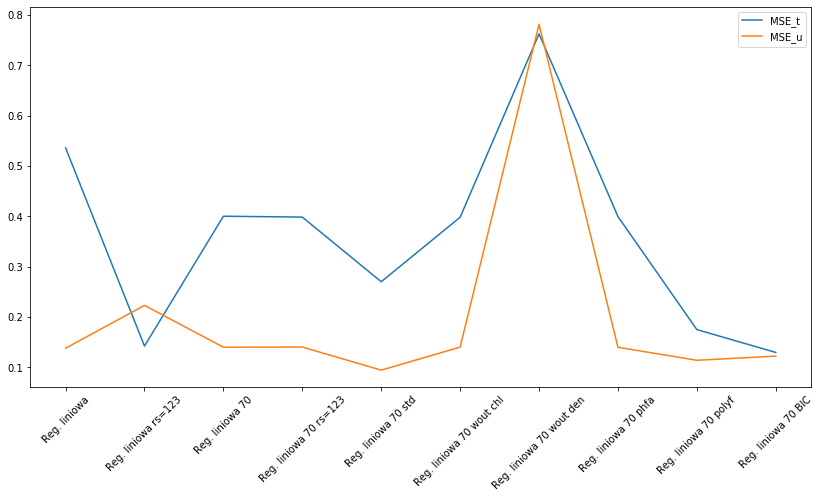

In [126]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.MSE_t, label='MSE_t')
plt.plot(df_results_errors.MSE_u, label='MSE_u')
plt.xticks(rotation=45)
plt.legend()
plt.show()

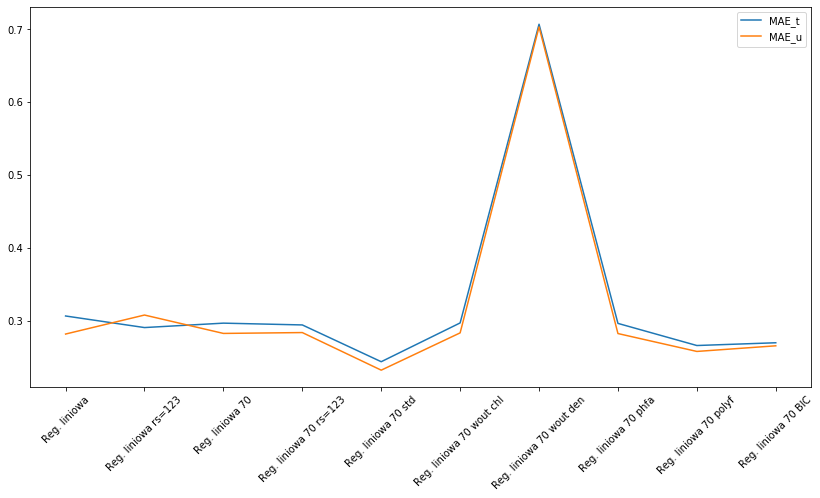

In [127]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.MAE_t, label='MAE_t')
plt.plot(df_results_errors.MAE_u, label='MAE_u')
plt.xticks(rotation=45)
plt.legend()
plt.show()

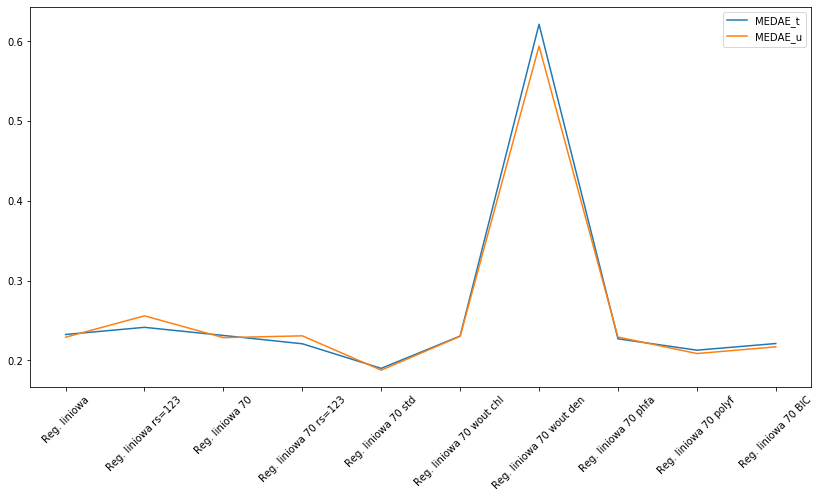

In [129]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.MEDAE_t, label='MEDAE_t')
plt.plot(df_results_errors.MEDAE_u, label='MEDAE_u')
plt.xticks(rotation=45)
plt.legend()
plt.show()

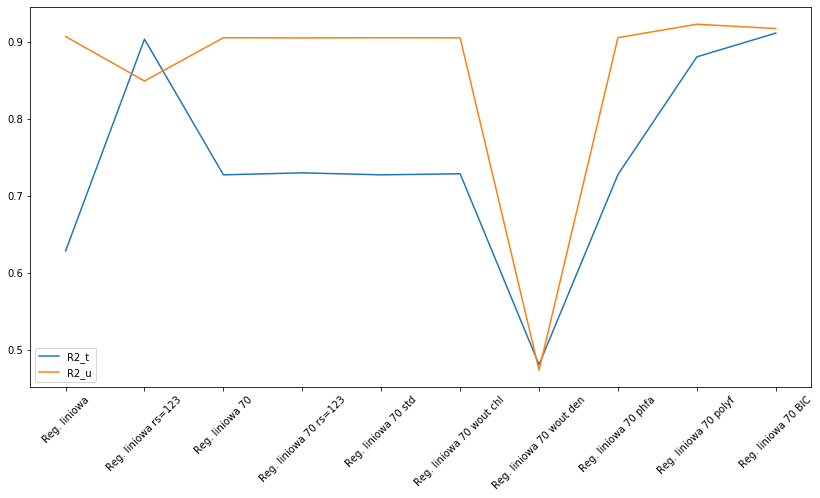

In [130]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.r_score_t, label='R2_t')
plt.plot(df_results_errors.r_score_u, label='R2_u')
plt.xticks(rotation=45)
plt.legend()
plt.show()